[RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [ ]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [27]:
from scipy import stats

In [3]:
import numpy as np

In [4]:
from datetime import datetime, time

In [5]:
def minutes(row): 
    return row//60

In [6]:
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

In [7]:
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_j= pd.read_csv("C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-01.csv", usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

In [ ]:
df_j

In [46]:
january = df_j[df_j['tpep_pickup_datetime'].dt.year == 2018]
january = january[january['tpep_pickup_datetime'].dt.month == 1]
january = january[january['tpep_dropoff_datetime'].dt.year == 2018]
january = january[january['tpep_dropoff_datetime'].dt.month <= 2]
january = january[january['payment_type'] >= 1]
january = january[january['payment_type'] <= 6]
january = january.dropna(subset=['payment_type'])
january = january[january['tpep_dropoff_datetime'] != january['tpep_pickup_datetime']]
january = january[january['trip_distance'] != 0.00]
january = january[january['trip_distance'] <= 200]
january 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,41,24,2,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,239,140,2,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,262,141,1,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,140,257,2,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,246,239,1,16.55
5,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,143,143,2,5.80
6,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,50,239,1,12.35
7,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,239,238,1,6.30
8,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,238,24,1,8.50
9,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,170,170,2,6.80


In [47]:
df_join = pd.merge(january,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])

In [48]:
df_join['duration'] = df_join['tpep_dropoff_datetime']-df_join['tpep_pickup_datetime']

In [49]:
df_join = df_join[df_join['duration'].dt.days == 0]

In [50]:
df_join = df_join[df_join['duration'].dt.seconds <= (3600*4)]

In [51]:
d_minutes = df_join['duration'].dt.seconds
d_minutes = pd.DataFrame(d_minutes)
d_minutes

,duration
0,198
1,1090
2,355
3,1949
4,1068
5,199
6,616
7,144
8,267
9,320


In [52]:
d_minutes = d_minutes['duration'].apply(minutes)

In [53]:
distance_duration_trip = pd.DataFrame(d_minutes)

In [54]:
distance_duration_trip['trip_distance'] = df_join['trip_distance']

In [55]:
distance_duration_trip

,duration,trip_distance
0,3,0.50
1,18,2.70
2,5,0.80
3,32,10.20
4,17,2.50
5,3,0.50
6,10,1.70
7,2,0.70
8,4,1.00
9,5,0.70


In [56]:
x = distance_duration_trip['duration'].tolist()

In [57]:
y = distance_duration_trip['trip_distance'].tolist()

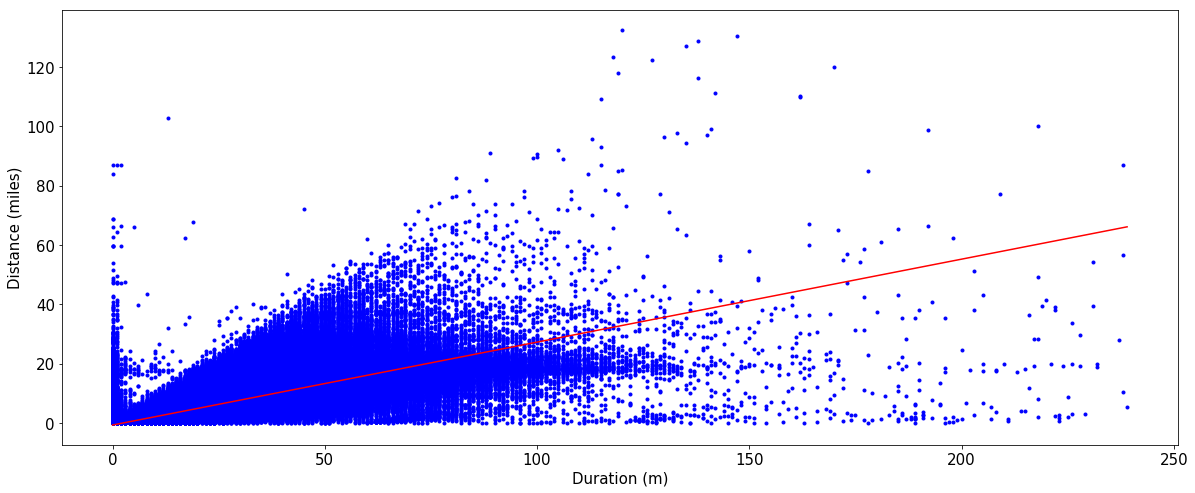

In [79]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx)
y1=gradient*x1+intercept
fig, ax = plt.subplots(figsize=(20,8))
ax.tick_params(labelsize=15)
plt.xlabel('Duration (m)', fontsize=15)
plt.ylabel('Distance (miles)', fontsize=15)
plt.plot(x,y,'ob',markersize= 3)
plt.plot(x1,y1,'-r')
plt.show()

In [85]:
pearson = round(distance_duration_trip['duration'].corr(distance_duration_trip['trip_distance']),4)

In [86]:
pearson

0.7959

Ciò che emerge dal grafico è che sussiste una correlazione lineare tra la durata del viaggio e la lunghezza del percorso in miglia. Ciò viene provato dal Coefficiente di correlazione lineare di Pearson che raggiunge un valore abbastanza vicno a 1 così da dimostrare che tra queste variabili c'è una correlazione lineare positiva. 